# Detection of COVID-19

### Importing Libraries

In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import time
import tensorflow as tf
import seaborn as sns

import keras
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.layers import  Flatten, Dense, Activation
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import os 
import cv2

folder1 = "Data/train/COVID19/"
folder2 = "Data/train/NORMAL/"
folder3 = "Data/train/PNEUMONIA/"

def load_images_from_folder(folder, num):
    images = []
    y = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename));
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = cv2.resize(img,(128,128))
        if img is not None:
            images.append(img)
            y.append(num)
    return images , y

OriginalCovidImages, class1 = load_images_from_folder(folder1,0)
OriginalNormalImages, class3 = load_images_from_folder(folder2,2)
OriginalViralPneumoniaImages, class2 = load_images_from_folder(folder3,1)


In [4]:
def reshapeimages(images, y):
    images = np.array(images)
    y = np.array(y).reshape(-1,1)
    return images, y

### Reshaping the images into numpy array

In [5]:
OriginalCovidImages, class1 = reshapeimages(OriginalCovidImages,class1)
OriginalViralPneumoniaImages, class2 = reshapeimages(OriginalViralPneumoniaImages,class2)
OriginalNormalImages, class3 = reshapeimages(OriginalNormalImages,class3)

print(len(OriginalCovidImages))
print(OriginalCovidImages.shape)
print(class1.shape)

460
(460, 128, 128, 3)
(460, 1)


#### Splitting the covid test data into train/validation/test

In [6]:
Covid_train, Covid_test, class1_train, class1_test = train_test_split(OriginalCovidImages,class1, test_size=0.1, random_state=42)
Covid_test, Covid_val, class1_test, class1_val = train_test_split(Covid_test, class1_test, test_size=0.2, random_state=42)
print(Covid_train.shape)
print(Covid_val.shape)
print(Covid_test.shape)

(414, 128, 128, 3)
(10, 128, 128, 3)
(36, 128, 128, 3)


#### Splitting the Viral Pneumonia Data into Train/Validation/Test

In [7]:
ViralP_train, ViralP_test, class2_train, class2_test = train_test_split(OriginalViralPneumoniaImages,class2, test_size=0.1, random_state=42)
ViralP_test, ViralP_val, class2_test, class2_val = train_test_split(ViralP_test, class2_test, test_size=0.2, random_state=42)
print(ViralP_train.shape)
print(ViralP_val.shape)
print(ViralP_test.shape)

(3076, 128, 128, 3)
(69, 128, 128, 3)
(273, 128, 128, 3)


#### Splitting the Normal Data into Train/Validation/Test

In [8]:
Normal_train, Normal_test, class3_train, class3_test = train_test_split(OriginalNormalImages,class3, test_size=0.1, random_state=42)
Normal_test, Normal_val, class3_test, class3_val = train_test_split(Normal_test, class3_test, test_size=0.2, random_state=42)
print(Normal_train.shape)
print(Normal_val.shape)
print(Normal_test.shape)

(1139, 128, 128, 3)
(26, 128, 128, 3)
(101, 128, 128, 3)


## Final Train Test Validation set

In [9]:
X_train = np.concatenate((Covid_train, ViralP_train, Normal_train), axis=0) 
y_train = np.concatenate((class1_train, class2_train, class3_train), axis=0) 
X_test = np.concatenate((Covid_test, ViralP_test, Normal_test), axis=0) 
y_test = np.concatenate((class1_test, class2_test, class3_test), axis=0) 
X_val = np.concatenate((Covid_val, ViralP_val, Normal_val), axis=0) 
y_val = np.concatenate((class1_val, class2_val, class3_val), axis=0) 


In [12]:
# print(X_train.shape)
# print()
# plt.figure()
# plt.imshow(X_train[4620])
# plt.colorbar()
# plt.grid(False)
# plt.show
# print(y_train[4620])

(4629, 128, 128, 3)



IndexError: index 12300 is out of bounds for axis 0 with size 4629

<Figure size 640x480 with 0 Axes>

In [13]:
X_train = X_train /255
X_test_scaled = X_test / 255
X_val = X_val/255

In [14]:
print(X_train.shape)
print(X_train)

(4629, 128, 128, 3)
[[[[0.1938419  0.1938419  0.1938419 ]
   [0.1740196  0.1740196  0.1740196 ]
   [0.18121937 0.18121937 0.18121937]
   ...
   [0.08950674 0.08950674 0.08950674]
   [0.09134497 0.09134497 0.09134497]
   [0.11372549 0.11372549 0.11372549]]

  [[0.25465685 0.25465685 0.25465685]
   [0.23872548 0.23872548 0.23872548]
   [0.23529412 0.23529412 0.23529412]
   ...
   [0.10171568 0.10171568 0.10171568]
   [0.10931373 0.10931373 0.10931373]
   [0.11372549 0.11372549 0.11372549]]

  [[0.28950673 0.28950673 0.28950673]
   [0.27086398 0.27086398 0.27086398]
   [0.273269   0.273269   0.273269  ]
   ...
   [0.22305453 0.22305453 0.22305453]
   [0.18515626 0.18515626 0.18515626]
   [0.16397059 0.16397059 0.16397059]]

  ...

  [[0.21470588 0.21470588 0.21470588]
   [0.2509804  0.2509804  0.2509804 ]
   [0.28111213 0.28111213 0.28111213]
   ...
   [0.37942708 0.37942708 0.37942708]
   [0.37867647 0.37867647 0.37867647]
   [0.38877144 0.38877144 0.38877144]]

  [[0.25099573 0.25099573

In [18]:
# from tensorflow.keras.utils import np_utils
# y_train = np_utils.to_categorical(y_train)
y_train = tf.keras.utils.to_categorical(y_train)
# y_test= np_utils.to_categorical(y_test)
y_test= tf.keras.utils.to_categorical(y_test)
# y_val = np_utils.to_categorical(y_val)
y_val = tf.keras.utils.to_categorical(y_val)


In [19]:
print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [20]:
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

# for layer in base_model.layers:
#     layer.trainable=False

# model = Sequential()
# model.add(Conv2D)
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation('relu'))
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dense(3))
# model.add(Activation('sigmoid'))

from numpy import concatenate
import keras.backend as K

input_shape = (128,128,3)

input_img = tf.keras.Input(shape=input_shape)
# Define the input layer
input_img = tf.keras.Input(shape=input_shape)

# First convolutional layer
Z1 = tf.keras.layers.Conv2D(8, (4, 4), strides=(1, 1), padding="same")(input_img)
A1 = tf.keras.layers.ReLU()(Z1)
P1 = tf.keras.layers.MaxPooling2D(pool_size=(8, 8), strides=(4, 4), padding="same")(A1)

# Second convolutional layer
Z2 = tf.keras.layers.Conv2D(filters=16,kernel_size=(2, 2), strides=(1, 1), padding="same")(P1)
A2 = tf.keras.layers.ReLU()(Z2)
P2 = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding="same")(A2)

# Third convolutional layer
Z3 = tf.keras.layers.Conv2D(32, (4, 4), strides=(1, 1), padding="same")(P2)
A3 = tf.keras.layers.ReLU()(Z3)
P3 = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding="valid")(A3)

# Skip Connection Z1
S1 = tf.keras.layers.Conv2D(16,kernel_size=(1,1),strides=(1,1),padding="same")(Z1)
S1_pooled = tf.keras.layers.MaxPool2D(pool_size=(56,56), strides=(8,8),padding = "same")

# Fourth convolutional layer
Z4 = tf.keras.layers.Conv2D(filters=16,kernel_size=(2, 2), strides=(1, 1), padding="same")(P3)
# merge = tf.keras.layers.Concatenate(axis=3)([Z4, S1_pooled])
A4 = tf.keras.layers.ReLU()(Z4)
P4 = tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding="same")(A4)

F = tf.keras.layers.Flatten()(P4)

D1 = tf.keras.layers.Dense(units = 16, activation="tanh")(F)

outputs = tf.keras.layers.Dense(units=3,activation="softmax")(D1)

model = tf.keras.Model(inputs=input_img, outputs = outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 8)    │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 16)       │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,531 (45.04 KB)

 Trainable params: 11,531 (45.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from keras.callbacks import EarlyStopping

learning_rate = 0.00001
decay_steps = 10
decay_rate = 1


lr_schedular = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, decay_steps, decay_rate)
optimizer1 = tf.keras.optimizers.Adam(learning_rate=lr_schedular)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer = optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train, batch_size=32,epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7714 - loss: 0.5521 - val_accuracy: 0.8667 - val_loss: 0.5093
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7822 - loss: 0.5455 - val_accuracy: 0.8762 - val_loss: 0.5006
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7850 - loss: 0.5455 - val_accuracy: 0.8667 - val_loss: 0.4923
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7839 - loss: 0.5450 - val_accuracy: 0.8762 - val_loss: 0.4837
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7926 - loss: 0.5329 - val_accuracy: 0.8762 - val_loss: 0.4758
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8040 - loss: 0.5170 - val_accuracy: 0.8857 - val_loss: 0.4700
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8111 - loss: 0.5119 - val_accuracy: 0.8667 - val_loss: 0.4604
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8130 - loss: 0.5090 - val_accu

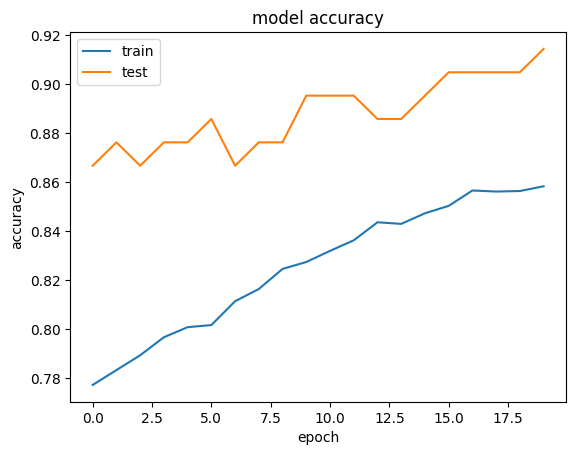

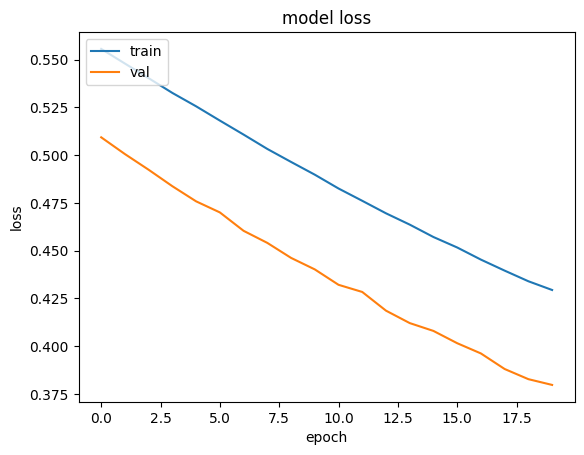

In [24]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [25]:
model.save('model3.h5')

In [26]:
model1 = load_model('model3.h5')

In [27]:
y_hat = model.predict(X_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [28]:
print(y_hat)

[[0.5872942  0.38075346 0.03195233]
 [0.5880544  0.29745367 0.11449196]
 [0.35573992 0.5857966  0.05846348]
 ...
 [0.10013322 0.32928464 0.5705821 ]
 [0.03745358 0.16590486 0.7966415 ]
 [0.03796502 0.70424503 0.25778997]]


In [29]:
y_pred = y_hat.round()
print(y_pred)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [30]:
print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8048780487804879


In [32]:
labels = ['Covid', 'Viral Pneumonia', 'Normal']
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
print(f"Accuracy: {accuracy}")

                 precision    recall  f1-score   support

          Covid       0.94      0.44      0.60        36
Viral Pneumonia       0.85      0.92      0.88       273
         Normal       0.82      0.61      0.70       101

      micro avg       0.85      0.80      0.82       410
      macro avg       0.87      0.66      0.73       410
   weighted avg       0.85      0.80      0.81       410
    samples avg       0.80      0.80      0.80       410

Accuracy: 0.8048780487804879


d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[ 19  17   0]
 [  7 252  14]
 [ 11  28  62]]


([<matplotlib.axis.XTick at 0x20a29a40890>,
 [Text(0.5, 0, 'Covid'),
  Text(1.5, 0, 'Viral Pneumonia'),
  Text(2.5, 0, 'Normal')])

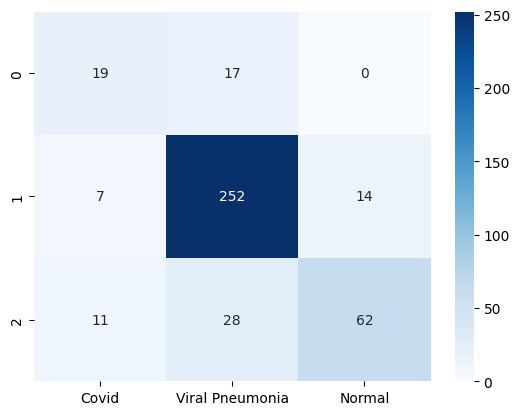

In [33]:
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

tick_labels = ['Covid', 'Viral Pneumonia', 'Normal']
plt.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels)
